In [1]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import hist
s = hist.tag.Slicer()

from coffea import util

In [2]:
rw = util.load("coffea/VBF_SMEFTsim_topU3l_NP1.coffea")

In [36]:
def plot_with_ratio(fig, ax, wc, rw, h1, h2, h3, rebin=1):
    
    var = h1.axes[0].name
    rw = rw[{var:s[::hist.rebin(rebin)]}]
    h1 = h1[{var:s[::hist.rebin(rebin)]}]
    h2 = h2[{var:s[::hist.rebin(rebin)]}]
    h3 = h3[{var:s[::hist.rebin(rebin)]}]
            
    rw_norm = rw[{'wc':wc+'=1.0'}]/rw[{'wc':wc+'=1.0'}].sum()
    rw_norm.plot(overlay='wc',ax=ax[0],label=wc+'=1.0 Reweighted')
    h1_norm = h1[{'wc':'SM'}]/h1.sum()
    h1_norm.plot(ax=ax[0],label=wc+'=1.0 Linear')
    h2_norm = h2[{'wc':'SM'}]/h2.sum()
    h2_norm.plot(ax=ax[0],label=wc+'=1.0 Quadratic')
    h3_norm = h3[{'wc':'SM'}]/h3.sum()
    h3_norm.plot(ax=ax[0],label=wc+'=1.0 Direct')
        
    rw_rat = rw_norm/rw[{'wc':'SM'}]*rw[{'wc':'SM'}].sum()
    rw_rat.plot(ax=ax[1])
    h1_rat = h1_norm/rw[{'wc':'SM'}]*rw[{'wc':'SM'}].sum()
    h1_rat.plot(ax=ax[1])
    h2_rat = h2_norm/rw[{'wc':'SM'}]*rw[{'wc':'SM'}].sum()
    h2_rat.plot(ax=ax[1])
    h3_rat = h3_norm/rw[{'wc':'SM'}]*rw[{'wc':'SM'}].sum()
    h3_rat.plot(ax=ax[1])
        
    ax[0].set_ylabel('Events (normalized)')
    ax[1].set_ylabel('Ratio to SM')
    ax[1].set_ylim(0,2)


In [37]:
def plot_var(wc_list, var):
    
    fig, ax = plt.subplots(2,1,sharex=True)
    fig.subplots_adjust(hspace=0)
    
    for wc in wc_list:
        direct = util.load("coffea/VBF_SMEFTsim_topU3l_Direct_"+wc+".coffea")
        linear = util.load("coffea/VBF_SMEFTsim_topU3l_Linear_"+wc+".coffea")
        quad = util.load("coffea/VBF_SMEFTsim_topU3l_Quad_"+wc+".coffea")

        h0 = rw[var]
        h1 = linear[var]
        h2 = quad[var]
        h3 = direct[var]

        plot_with_ratio(fig, ax, wc, h0, h1, h2, h3, rebin=5)
        
    fig.legend(frameon=False,bbox_to_anchor=(1.3,0.9))
    #fig.savefig("figures/"+wc+"/overlay_"+var+"_"+wc+".png",bbox_inches='tight')

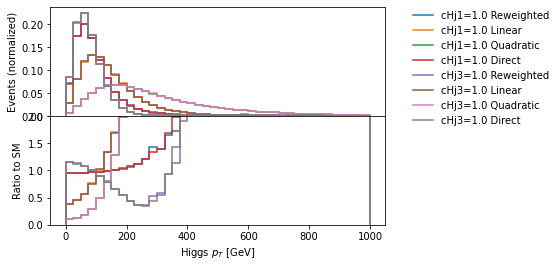

In [38]:
plot_var(['cHj1','cHj3'],'hpt')

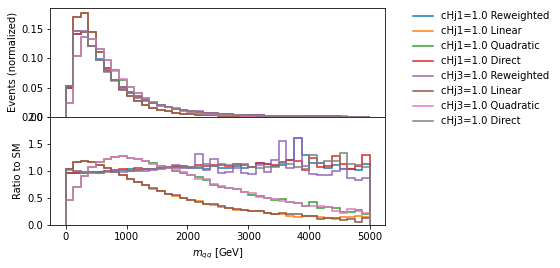

In [39]:
plot_var(['cHj1','cHj3'],'mqq')

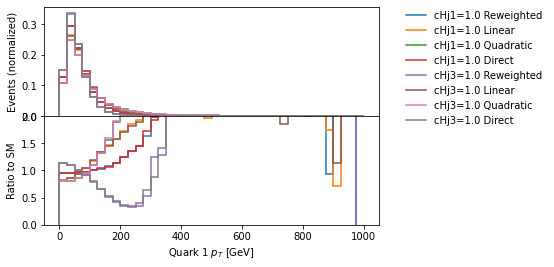

In [40]:
plot_var(['cHj1','cHj3'],'q1pt')

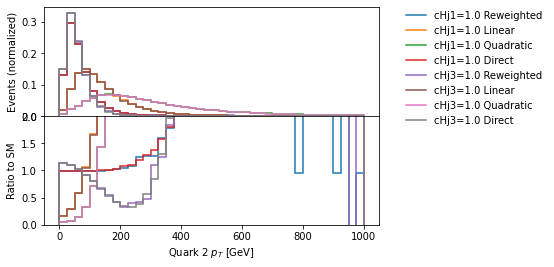

In [41]:
plot_var(['cHj1','cHj3'],'q2pt')

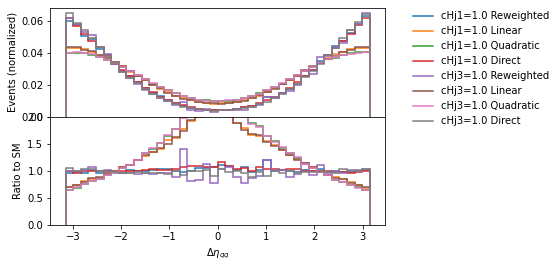

In [42]:
plot_var(['cHj1','cHj3'],'detaqq')

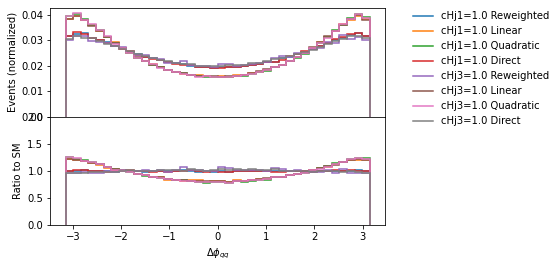

In [43]:
plot_var(['cHj1','cHj3'],'dphiqq')